# Final Project

Name: Anisul Arman

Course_ID: IS 362 Data Acquisition and Management . 

### **Mercedes-Benz USA Price Analysis & Prediction**
### Description
This dataset provides information about car listings in the USA, focusing on various models of Mercedes-Benz vehicles. It includes:
- **Name**: Car name and model
- **Mileage**: Car mileage in miles
- **Rating**: Car dealer rating
- **Review Count**: Number of dealer reviews
- **Price**: Price in USD

**Motivation**

The used car market is complex and influenced by numerous factors, including vehicle condition, mileage, model year, and dealer reputation. Specifically, for luxury brands like Mercedes-Benz, understanding how these factors affect resale price is crucial for both buyers and sellers. This analysis aims to uncover the key drivers behind used Mercedes-Benz vehicle prices in the U.S. market. By identifying patterns and relationships within the data, consumers can make more informed purchasing decisions, and dealerships can optimize their pricing strategies to remain competitive and maximize revenue. Additionally, insights from this study could help predict vehicle prices, benefiting both market analysts and stakeholders in the automotive industry.

### **Data Source**
[USA Mercedes-Benz Prices Dataset](https://www.kaggle.com/datasets/danishammar/usa-mercedes-benz-prices-dataset)

### **Data Analytics Workflow**
1. **Data Acquisition**
2. **Transformation & Cleaning**
3. **Exploratory Analysis**
4. **Statistical Summaries**
5. **Visual Analytics**
6. **Predictive Modeling**

In [21]:
%%capture
!pip install kagglehub
!pip install plotly
!pip install sklearn

In [22]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import kagglehub
import re
import shutil
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
data_file  = "usa_mercedes_benz_prices.csv"
# Download the dataset
path = kagglehub.dataset_download("danishammar/usa-mercedes-benz-prices-dataset")

# Copy file to current folder
csv_file = os.path.join(path,data_file)
shutil.copy(csv_file, ".")

'.\\usa_mercedes_benz_prices.csv'

In [24]:
# Load the dataset
df = pd.read_csv(data_file)
df.head()

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"


In [25]:
# Clean and transform the data
df['Mileage'] = df['Mileage'].str.replace(' mi', '').str.replace(',', '').astype(float)
df = df[df['Price'] != 'Not Priced'].copy()
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
df.head()

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,29636.0,3.9,"1,800",30900.0
1,2022 Mercedes-Benz AMG SL 63 Base,5540.0,4.7,"1,239",139999.0
2,2022 Mercedes-Benz AMG SL 63 Base,4890.0,4.7,"1,239",132999.0
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,29746.0,4.8,752,58587.0
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,32631.0,5.0,"1,502",95990.0


In [26]:
# Extract year and model from 'Name'
df['Year'] = df['Name'].str.extract(r'(^\d{4})').astype(float)
df['Model'] = df['Name'].str.extract(r'^\d{4}\s+(.*)')
df.head()

,Name,Mileage,Rating,Review Count,Price,Year,Model
0,2021 Mercedes-Benz A-Class A 220 4MATIC,29636.0,3.9,"1,800",30900.0,2021.0,Mercedes-Benz A-Class A 220 4MATIC
1,2022 Mercedes-Benz AMG SL 63 Base,5540.0,4.7,"1,239",139999.0,2022.0,Mercedes-Benz AMG SL 63 Base
2,2022 Mercedes-Benz AMG SL 63 Base,4890.0,4.7,"1,239",132999.0,2022.0,Mercedes-Benz AMG SL 63 Base
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,29746.0,4.8,752,58587.0,2020.0,Mercedes-Benz AMG E 53 Base 4MATIC
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,32631.0,5.0,"1,502",95990.0,2021.0,Mercedes-Benz AMG GLS 63 Base 4MATIC


In [27]:
# Clean and transform Review Count
df['Review Count'] = df['Review Count'].str.replace(' reviews', '').str.replace(',', '').astype(float)
df.head()

,Name,Mileage,Rating,Review Count,Price,Year,Model
0,2021 Mercedes-Benz A-Class A 220 4MATIC,29636.0,3.9,1800.0,30900.0,2021.0,Mercedes-Benz A-Class A 220 4MATIC
1,2022 Mercedes-Benz AMG SL 63 Base,5540.0,4.7,1239.0,139999.0,2022.0,Mercedes-Benz AMG SL 63 Base
2,2022 Mercedes-Benz AMG SL 63 Base,4890.0,4.7,1239.0,132999.0,2022.0,Mercedes-Benz AMG SL 63 Base
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,29746.0,4.8,752.0,58587.0,2020.0,Mercedes-Benz AMG E 53 Base 4MATIC
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,32631.0,5.0,1502.0,95990.0,2021.0,Mercedes-Benz AMG GLS 63 Base 4MATIC


In [28]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2428 entries, 0 to 2428
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2428 non-null   object 
 1   Mileage       2428 non-null   float64
 2   Rating        2134 non-null   float64
 3   Review Count  2397 non-null   float64
 4   Price         2428 non-null   float64
 5   Year          2428 non-null   float64
 6   Model         2428 non-null   object 
dtypes: float64(5), object(2)
memory usage: 151.8+ KB


In [29]:
df.describe()

,Mileage,Rating,Review Count,Price,Year
count,2428.000000,2134.000000,2397.000000,2428.000000,2428.000000
mean,20080.962521,4.533739,1267.528160,55994.378501,2021.770181
std,17802.751607,0.386596,1261.422175,31402.041807,1.590008
min,100.000000,2.100000,0.000000,8999.000000,2014.000000
25%,5843.000000,4.400000,344.000000,38000.000000,2021.000000
50%,14017.000000,4.600000,919.000000,46925.500000,2022.000000
75%,31195.000000,4.800000,1800.000000,62440.750000,2023.000000
max,194043.000000,5.000000,7140.000000,229918.000000,2024.000000


In [30]:
# Project includes at least one grouping or aggregation.
# Group by Model and calculate average price
avg_price_by_model = df.groupby('Model')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)

# Display the top 10 models with highest average prices
avg_price_by_model.head(10)

,Model,Price
29,Mercedes-Benz AMG G 63 4MATIC,208214.629630
28,Mercedes-Benz AMG G 63,203016.000000
193,Mercedes-Benz Maybach S 680 4MATIC,198888.000000
30,Mercedes-Benz AMG G 63 Base,162365.375000
191,Mercedes-Benz Maybach S 580 4MATIC,161183.600000
112,Mercedes-Benz E-Class E 63 AMG 4MATIC,154189.500000
189,Mercedes-Benz Maybach GLS 600 4MATIC,149635.000000
83,Mercedes-Benz AMG SL 63 Base,144161.750000
146,Mercedes-Benz G-Class G 550 4MATIC,143948.750000
77,Mercedes-Benz AMG GT R,143793.666667


In [31]:
top_10 = avg_price_by_model.head(10)

fig = px.line(
    top_10,
    x='Model',
    y='Price',
    markers=True,
    title='Top 10 Mercedes-Benz Models by Average Price',
    labels={'Price': 'Average Price (USD)', 'Model': 'Car Model'},
    template='plotly_white'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [32]:
fig = px.scatter(
    df,
    x='Year',
    y='Price',
    title='Mercedes-Benz Car Price by Year',
    labels={'Year': 'Car Year', 'Price': 'Price (USD)'},
    trendline='ols',
    template='plotly_white',
    hover_data=['Model']  
)

fig.show()

In [33]:
# Histogram of car prices
fig = px.histogram(
    df,
    x='Price',
    nbins=50,
    title='Distribution of Mercedes-Benz Car Prices',
    labels={'Price': 'Price (USD)'},
    template='plotly_white'
)
fig.update_layout(
    xaxis_title='Price (USD)',
    yaxis_title='Count'
)
fig.show()

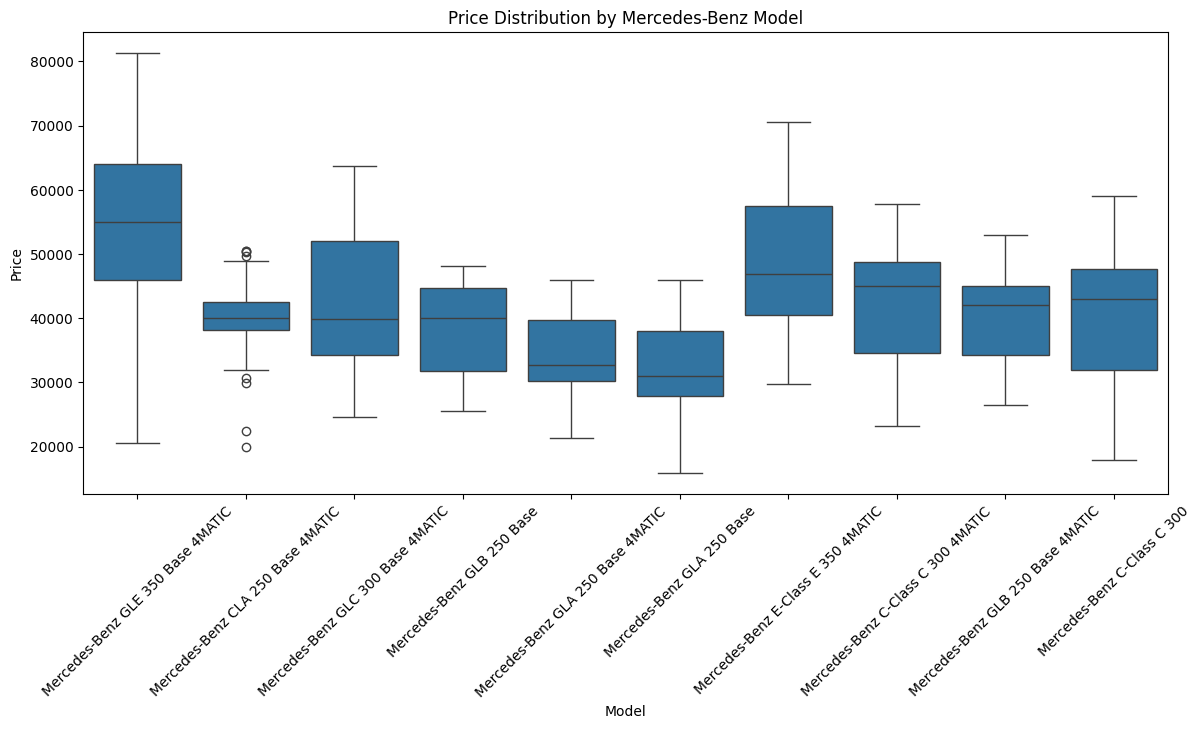

In [34]:
# Price by Model (Top 10 models)
top_models = df['Model'].value_counts().nlargest(10).index
df_top_models = df[df['Model'].isin(top_models)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_models, x='Model', y='Price')
plt.xticks(rotation=45)
plt.title("Price Distribution by Mercedes-Benz Model")
plt.show()

In [35]:
# Scatter plot of Mileage vs Price
fig = px.scatter(df, x='Mileage', y='Price', color='Model',
                 title='Mileage vs Price by Model', hover_data=['Year'])
fig.show()

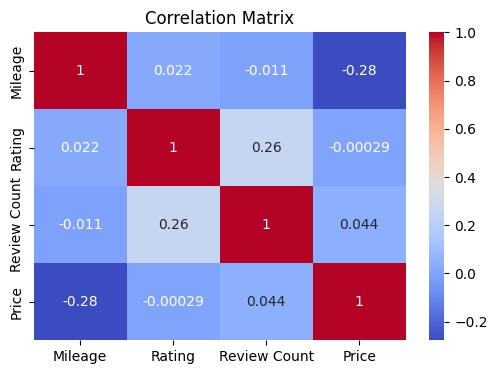

In [36]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Mileage', 'Rating', 'Review Count', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Select features for the model
features = ['Mileage','Year']
df_model = df.dropna(subset=features + ['Price'])

X = df_model[features]
y = df_model['Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict
y_pred = model.predict(X_test)

In [40]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Model Coefficients: [-3.82999142e-01  1.00192391e+03]
Intercept: -1962345.524063111
Mean Squared Error: 1058506996.67
R-squared: 0.10


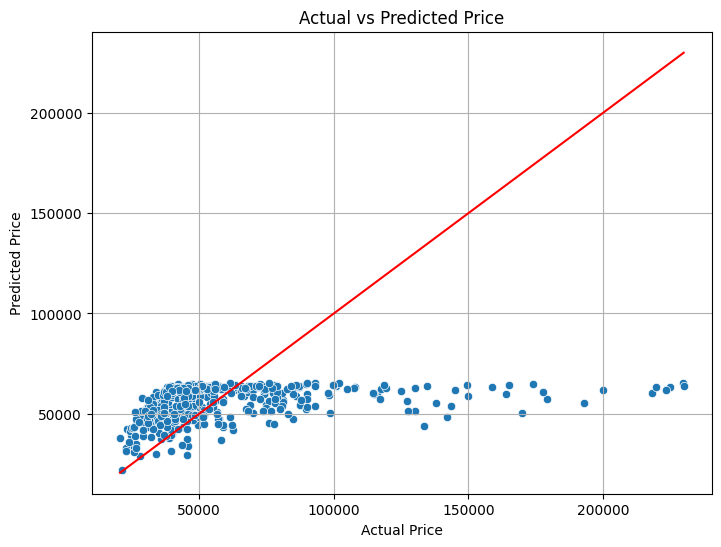

In [41]:
# Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()

## Scrapping Data from Html Table

#### **Analysis of the Relationship Between Fertility Rate and Median Age Across Countries**
Fertility rate and median age are key demographic indicators that influence population growth and social dynamics in a country. Understanding the relationship between these two variables can provide insights into population trends, healthcare needs, and economic development.

**Hypothesis:**
* Null Hypothesis (H₀): There is no correlation between fertility rate and median age across countries. (ρ = 0)

* Alternative Hypothesis (H₁): There is a significant negative correlation between fertility rate and median age across countries. (ρ < 0)

In [42]:
# Get the page content
url = "https://www.worldometers.info/world-population/population-by-country/#google_vignette"
response = requests.get(url)
response.raise_for_status()

# Read all tables from the HTML content using pandas
tables = pd.read_html(response.text)

# scrape the first table contains the population data we want
df = tables[0]

# Rename columns for easier access
df.columns = ['#', 'Country', 'Population_2025', 'Yearly_Change', 'Net_Change', 
              'Density_PKm2', 'Land_Area_Km2', 'Migrants_Net', 'Fert_Rate', 
              'Median_Age', 'Urban_Pop_Percent', 'World_Share']

df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27704\1223981896.py:7: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,#,Country,Population_2025,Yearly_Change,Net_Change,Density_PKm2,Land_Area_Km2,Migrants_Net,Fert_Rate,Median_Age,Urban_Pop_Percent,World_Share
0,1,India,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%
1,2,China,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%


In [ ]:
# transofrm data

In [43]:
# Select relevant columns for your analysis
df_analysis = df[['Country', 'Fert_Rate', 'Median_Age']].copy()
df_analysis.head()

,Country,Fert_Rate,Median_Age
0,India,1.94,28.8
1,China,1.02,40.1
2,United States,1.62,38.5
3,Indonesia,2.10,30.4
4,Pakistan,3.50,20.6


In [44]:
# Calculate correlation
corr = df_analysis['Fert_Rate'].corr(df_analysis['Median_Age'])
print(f"Correlation between Fertility Rate and Median Age: {corr:.3f}")

Correlation between Fertility Rate and Median Age: -0.855


In [45]:
# Aggregate - find countries with highest median age and lowest fertility rate (e.g. "best")
top_median_age = df_analysis.sort_values(by='Median_Age', ascending=False).head(10)
top_low_fertility = df_analysis.sort_values(by='Fert_Rate').head(10)

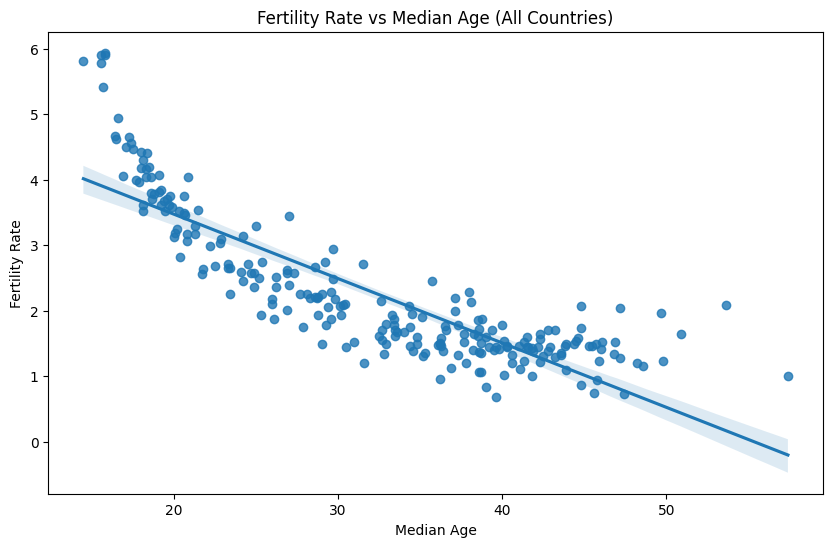

In [46]:
# Plot scatterplot with regression line using seaborn
plt.figure(figsize=(10,6))
sns.regplot(x='Median_Age', y='Fert_Rate', data=df_analysis)
plt.title('Fertility Rate vs Median Age (All Countries)')
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27704\4042518973.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




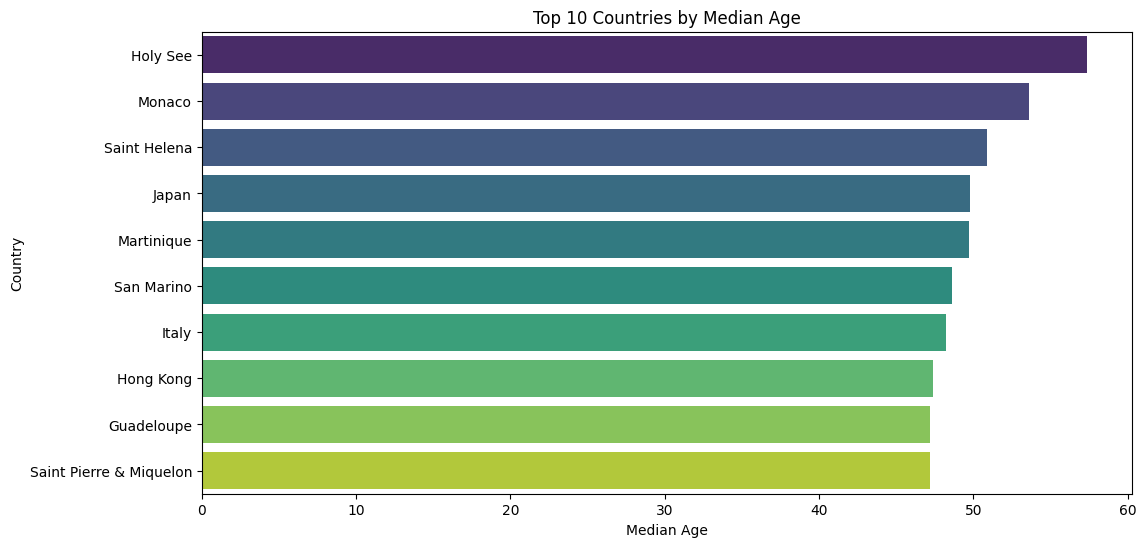

In [47]:
# Plot bar chart for top 10 countries with highest median age
plt.figure(figsize=(12,6))
sns.barplot(x='Median_Age', y='Country', data=top_median_age, palette='viridis')
plt.title('Top 10 Countries by Median Age')
plt.xlabel('Median Age')
plt.ylabel('Country')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27704\2338184118.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




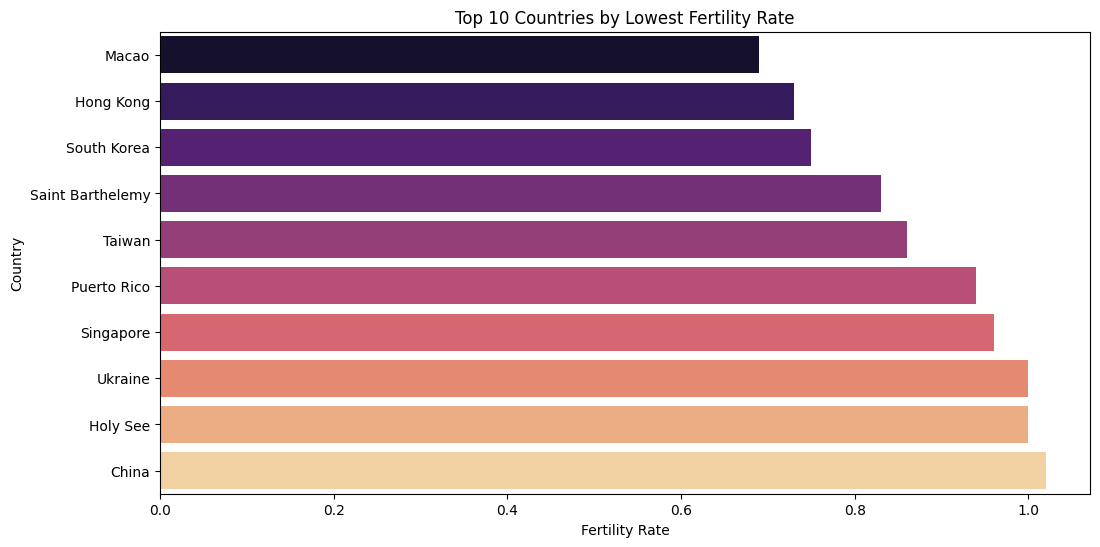

In [48]:
# Plot bar chart for top 10 countries with lowest fertility rate
plt.figure(figsize=(12,6))
sns.barplot(x='Fert_Rate', y='Country', data=top_low_fertility, palette='magma')
plt.title('Top 10 Countries by Lowest Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Country')
plt.show()